<a href="https://colab.research.google.com/github/victorsantanaa/imersaoDadosAlura/blob/main/Desafios_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolução realizada por [Victor Santana](https://github.com/victorsantanaa)

Desafio 01: Proporção de inscritos por idade

Desafio 02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio 03: Colocar título no histograma.

Desafio 04: Plotar os Histogramas das idades dos treineiros e não treineiros.

Desafio 05: Comprar distribuição nas provas de Espanhol e Inglês (histograma ou boxplot)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

#Desafio 01: Proporção de inscritos por idade

In [29]:


fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)

dados["NU_IDADE"].value_counts()/len(dados)*100

18    16.840948
17    16.687078
19    11.318888
20     8.174753
16     6.146962
        ...    
75     0.001570
73     0.001570
82     0.000785
77     0.000785
76     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

In [30]:
num_por_id = dados['NU_IDADE'].value_counts().sort_index() # contando e fazendo sort dos index
index = dados['NU_IDADE'].value_counts().sort_index().index # Index 
num_por_id = [(i/num_por_id.sum()) * 100 for i in num_por_id]

No handles with labels found to put in legend.


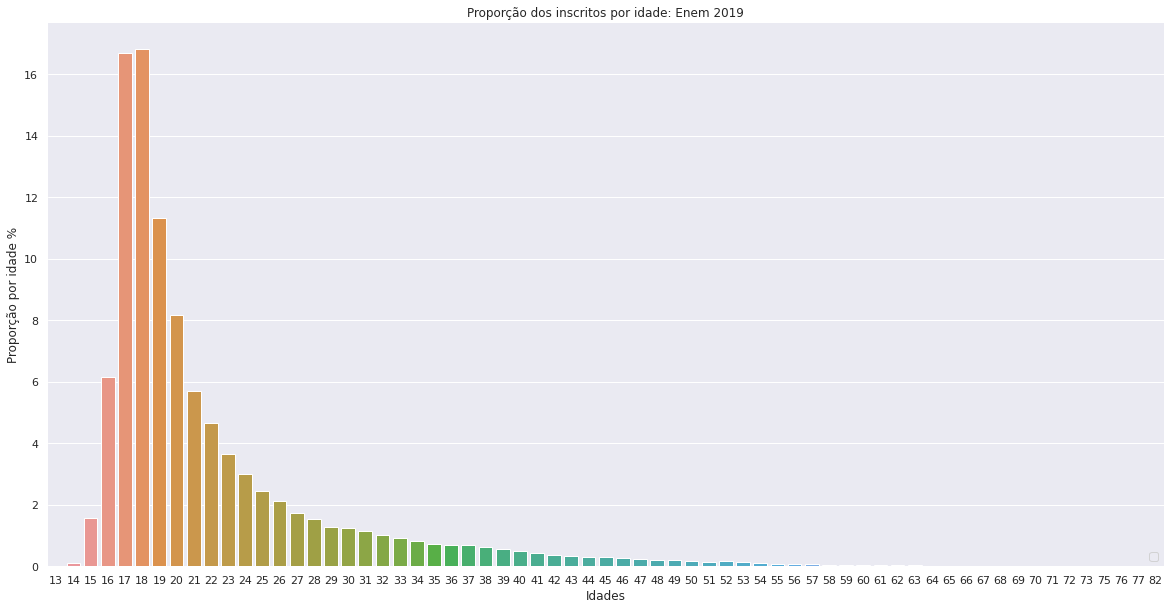

In [31]:
sns.set_theme(style="darkgrid")

f, ax = plt.subplots(figsize=(20, 10))

sns.set_color_codes("pastel")
sns.barplot(y = num_por_id, x=index)

ax.legend(ncol=2, loc="lower right", frameon=True)

plt.ylabel('Proporção por idade %')
plt.xlabel('Idades')
plt.title('Proporção dos inscritos por idade: Enem 2019')

sns.despine(left=True, bottom=True)

#Desafio 02: Descobrir de quais estados são os inscritos com 13 anos.

In [32]:


print('UF dos inscritos que com idade igual a 13 anos: Enem 2019')

dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"].value_counts()

UF dos inscritos que com idade igual a 13 anos: Enem 2019


BA    1
SP    1
MT    1
AP    1
Name: SG_UF_RESIDENCIA, dtype: int64

#Desafio 03: Colocar título no histograma.

Text(0.5, 1.0, 'Distribuição de idades que fizeram o enem 2019')

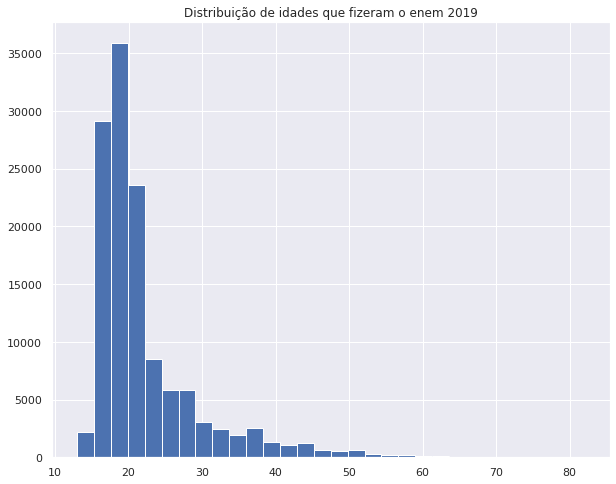

In [33]:

dados['NU_IDADE'].hist(bins = 30, figsize = (10, 8))
plt.title("Distribuição de idades que fizeram o enem 2019")

#Desafio 04: Plotar os Histogramas das idades dos treineiros e não treineiros.

IN_TREINEIRO
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: NU_IDADE, dtype: object

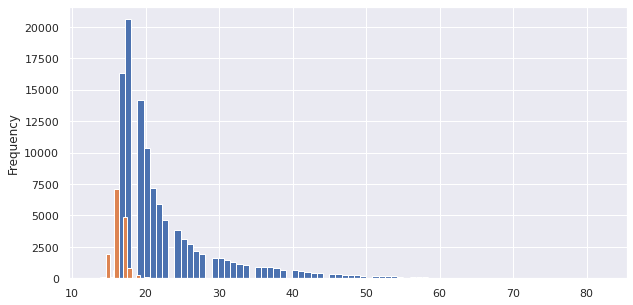

In [36]:
dados.groupby("IN_TREINEIRO")["NU_IDADE"].plot(kind = 'hist', bins = 82, figsize = (10, 5))

#Desafio 05: Comprar distribuição nas provas de Espanhol e Inglês (histograma ou boxplot)

Text(0.5, 1.0, 'Distribuição Provas por Linguagem')

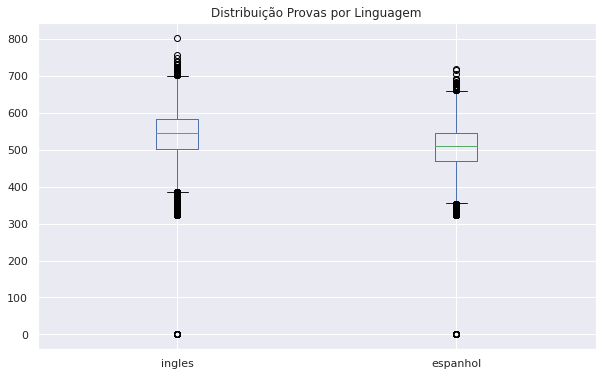

In [37]:
#Desafio 05: Comprar distribuição nas provas de Espanhol e Inglês (histograma ou boxplot)
linguas = {
    'ingles' : dados.query("TP_LINGUA == 0")["NU_NOTA_LC"],
    'espanhol' : dados.query("TP_LINGUA == 1")["NU_NOTA_LC"],
}

dadosLinguas = pd.DataFrame(linguas)
dadosLinguas.plot.box(grid = True, figsize=(10,6))
plt.title("Distribuição Provas por Linguagem")



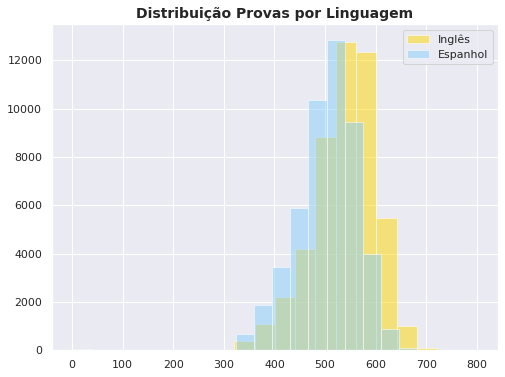

In [38]:
dados.query("TP_LINGUA == 0")["NU_NOTA_LC"].hist(bins = 20, figsize = (8, 6), color = "gold", alpha = 0.5).set_title("Distribuição Provas por Linguagem", fontdict={'size':14,'weight':'bold'})
dados.query("TP_LINGUA == 1")["NU_NOTA_LC"].hist(bins = 20, figsize = (8, 6), color = "lightskyblue", alpha = 0.5).set_title("Distribuição Provas por Linguagem", fontdict={'size':14,'weight':'bold'})

plt.legend(["Inglês", "Espanhol"])